In [47]:
from matplotlib import pyplot as plt
import numpy as np
import csv


<b>1. File data-3.csv contains the results of the experiment in the form of list of pairs (x, y). Find a line y = ax + b which matches the given data. What are the parameters a and b?</b>

In [99]:
FILENAME = 'data-3.csv'
X, Y = np.array([]), np.array([])

with open(FILENAME) as f:
    data = csv.reader(f)
    for row in data:
        X = np.append(X, float(row[0]))
        Y = np.append(Y, float(row[1]))
N = len(Y)

In [100]:
def get_loss(y_predicted, Y):
    # mean squared error
    return sum((y_p - y)**2 for y_p, y in zip(y_predicted, Y)) / len(Y)

# y = slope * x + intercept
def h(x, slope, intercept):
    # function that makes predictions
    return slope * x + intercept

def find_slope_and_intercept(X, Y):
    sum_x = sum(X)
    sum_y = sum(Y)
    sum_x_quad = sum(map(lambda x: x**2, X))
    sum_xy = sum(x * y for x, y in zip(X, Y))

    slope = (N * sum_xy - sum_x * sum_y) / (N * sum_x_quad - sum_x**2)
    intercept = (sum_y - slope * sum_x) / N
    
    return slope, intercept

In [101]:
slope, intercept = find_slope_and_intercept(X, Y)

y_predicted = list(map(lambda x: h(x, slope, intercept), X))
loss = get_loss(y_predicted, Y)
print('loss: {}'.format(loss))

loss: 6.899576273218271


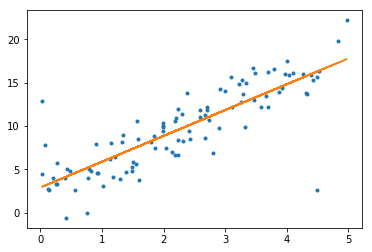

In [102]:
plt.plot(X,Y, '.')
plt.plot(X, y_predicted)
plt.show()

<b>2. Find outliers if such exist and find the best fitting line again. Compare the results.</b>

In [103]:
# let's find outliers by calculating absolute distance between median and each point
# and sort them by distance and then choose distance threshold for dataset
median = np.median(Y)

y_with_distances = np.array([(abs(median - y), y) for y in Y])
sorted_y_with_distances = sorted(y_with_distances, key=lambda t: t[0], reverse=True)
print(sorted_y_with_distances)

[array([12.59333376, 22.21791912]), array([10.24042374, -0.61583838]), array([10.23638328, 19.86096864]), array([ 9.72119083, -0.09660548]), array([ 7.88321766, 17.50780302]), array([7.07242414, 2.55216122]), array([ 7.06583524, 16.6904206 ]), array([6.9876953 , 2.63689006]), array([6.9765759 , 2.64800946]), array([ 6.95841246, 16.58299781]), array([6.87463547, 2.74994988]), array([ 6.7681913 , 16.39277665]), array([ 6.63366834, 16.2582537 ]), array([6.58259877, 3.04198659]), array([ 6.50922117, 16.13380653]), array([ 6.44877121, 16.07335657]), array([ 6.42331143, 16.04789679]), array([ 6.40044587, 16.02503123]), array([6.37982043, 3.24476493]), array([6.34740721, 3.27717815]), array([ 6.24660735, 15.87119271]), array([ 6.21358057, 15.83816593]), array([ 6.06439557, 15.68898093]), array([ 6.01378639, 15.63837175]), array([5.84029175, 3.7842936 ]), array([ 5.72880446, 15.35338982]), array([5.69444377, 3.93014159]), array([5.68198727, 3.94259808]), array([ 5.67323515, 15.29782051]), arra

In [104]:
# we see that error for first 5 points much bigger than for previous(the same on the plot),
# let's try delete them and calculate loss, plot

DISTANCE_THRESHOLD = 7.1
xy_without_outliers = np.array([(x, y) for x, (distance, y) in zip(X, y_with_distances) if distance <= DISTANCE_THRESHOLD])
x_without_outliers = np.array([p[0] for p in xy_without_outliers])
y_without_outliers = np.array([p[1] for p in xy_without_outliers])

slope, intercept = find_slope_and_intercept(x_without_outliers, y_without_outliers)
y_predicted = list(map(lambda x: h(x, slope, intercept), x_without_outliers))
loss = get_loss(y_predicted, y_without_outliers)
print('loss: {}'.format(loss))

loss: 6.368017249263382


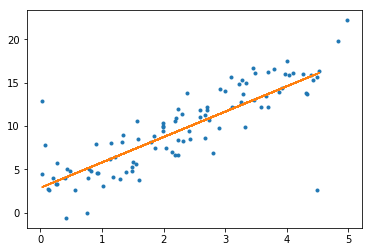

In [105]:
# loss is less than previous that includes outliers, that works!
plt.plot(X,Y, '.')
plt.plot(x_without_outliers, y_predicted)
plt.show()

<b>3.Conduct experiments with gradient descent notebook. Try to use different parameters for learning rate, starting point, etc.</b>

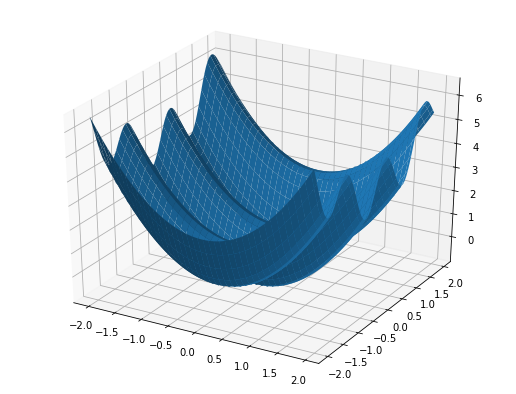

In [106]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
X1 = np.arange(-2., 2, 0.05)
X2 = np.arange(-2., 2, 0.05)
X1, X2 = np.meshgrid(X1, X2)
Y = X1**2 + 0.5*X2**2 + np.sin(5*X2)
ax.plot_surface(X1, X2, Y)
plt.show()

In [107]:
def F(x):
    x1, x2 = x
    return x1**2 + 0.5*x2**2 + np.sin(5*x2)

def F1(x):
    x1, x2 = x
    return np.array([2*x1, x2 + 5*np.cos(5*x2)])


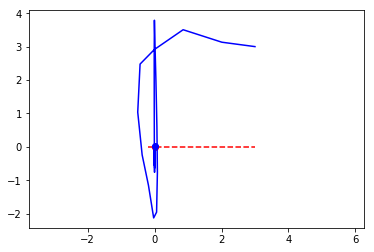

Distance to the goal: 0.02887745127734348


In [108]:
# I changed eta 0.55 --> 0.33, and number of epochs 30 --> 31
# after changes it shows pretty good results Distance to the goal: 2.53 --> 0.028
eta = 0.33
X = [ np.array([3.0, 3.0]) ]
grad_p = np.array([0,0])

for i in range(31):
    grad = F1(X[-1])
    grad = 0.5*(grad+grad_p)
    
    x_next = X[-1] - eta * grad
    grad_p = grad
    
    X.append(x_next)
    eta *= 0.9999
    
x1,x2 = zip(*X)
plt.axis('equal')
plt.plot([-0.2, 3], [0., 0.], 'r--')
plt.plot(0,0,'or')
plt.plot(x1,x2,'-b')
plt.plot(x1[-1],x2[-1],'ob')
plt.show()
print("Distance to the goal: {}".format(np.linalg.norm(x_next)))